![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

Import the modules

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Import the datasets

In [54]:
# Read the csv files
men = pd.read_csv("men_results.csv", parse_dates=["date"])
women = pd.read_csv("women_results.csv", parse_dates=["date"])


for df in [men, women]:
    # Add a column that sums home score and away score to get total goals
    df["goals"] = df.home_score + df.away_score
    
    # Display head, shape and type of data of each column
    display(df.head())
    display(df.shape)
    display(df.dtypes)

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,goals
0,0,1872-11-30,Scotland,England,0,0,Friendly,0
1,1,1873-03-08,England,Scotland,4,2,Friendly,6
2,2,1874-03-07,Scotland,England,2,1,Friendly,3
3,3,1875-03-06,England,Scotland,2,2,Friendly,4
4,4,1876-03-04,Scotland,England,3,0,Friendly,3


(44353, 8)

Unnamed: 0             int64
date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
goals                  int64
dtype: object

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,goals
0,0,1969-11-01,Italy,France,1,0,Euro,1
1,1,1969-11-01,Denmark,England,4,3,Euro,7
2,2,1969-11-02,England,France,2,0,Euro,2
3,3,1969-11-02,Italy,Denmark,3,1,Euro,4
4,4,1975-08-25,Thailand,Australia,3,2,AFC Championship,5


(4884, 8)

Unnamed: 0             int64
date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
goals                  int64
dtype: object

In [55]:
# Filter both datasets for matches after 2002-01-01 that took place in FIFA World Cup
men = men[(men.date > '2002-01-01') & (men.tournament == "FIFA World Cup")]
women = women[(women.date > '2002-01-01') & (women.tournament == "FIFA World Cup")]

In [56]:
# Mean of golas for each sample
print("mean goals for men:", men.goals.mean().round(2))
print("mean goals for women:", women.goals.mean().round(2))

mean goals for men: 2.51
mean goals for women: 2.98


Is the distribution of both samples normal? Let's find out.

In [57]:
# Function to plot the distribution of a sample over a standard normal curve
def plot_kde_over_norm(data, ax):
    
    # Create the standard normal curve
    x = np.linspace(-3,3)
    y = stats.norm(0,1).pdf(x)
    
    # Plot the standard normal curve
    ax.plot(x,y, linestyle="--")
    
    # Standardize the give data and plot it over the normal curve
    sns.kdeplot(stats.zscore(data), color="red", ax=ax)
    
    # Add a legend
    ax.legend(["Normal", "Sample"])

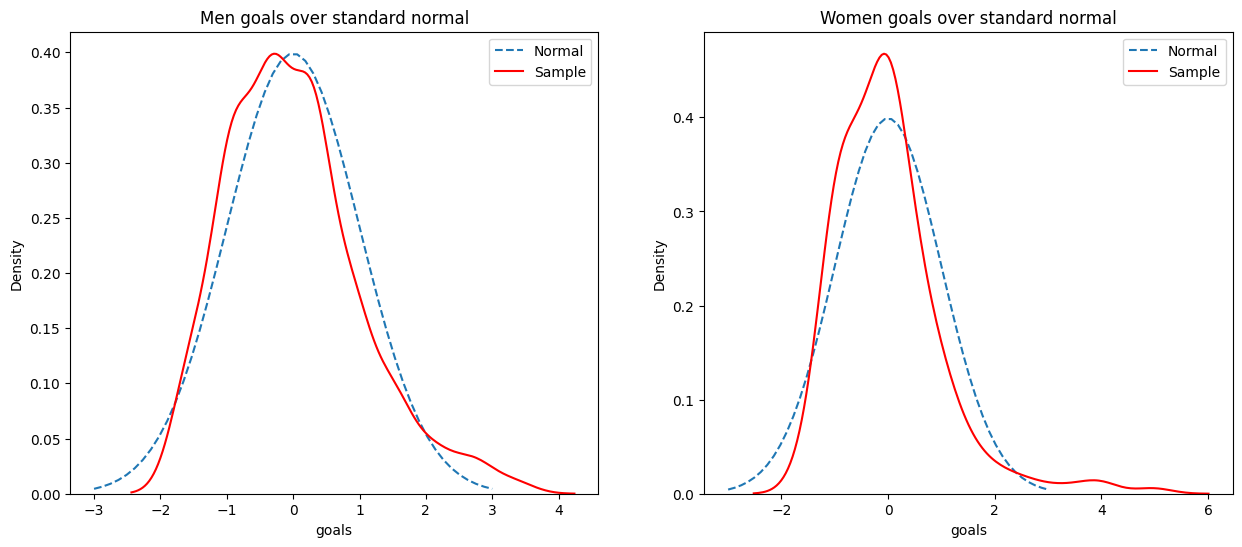

In [58]:
# Plot the distribution of goals for each dataset
fig, ax = plt.subplots(1, 2, figsize=[15, 6])
plot_kde_over_norm(men.goals, ax[0])
plot_kde_over_norm(women.goals, ax[1])
ax[0].set_title("Men goals over standard normal")
ax[1].set_title("Women goals over standard normal");

The distribution is not normal, therefore we cannot use a parametric test. Among the non parametric tests for non paired samples, the Whitney-Mann U test is often a good choice, so let's use it.

In [59]:
# Significance level
alpha = 0.1

# Hypothesis test
hypothesis_test = stats.mannwhitneyu(women.goals, men.goals, alternative="greater")

# P-value extraction
p_value = round(hypothesis_test[1], 4)

# Result interpretation
if p_value < alpha:
    print(f"P-value = {p_value} , null hypothesis rejected at 10% significance.".format(p_value))

else:
    print(f"P-value = {p_value} , failde to reject the null hypothesis at 10% significance.".format(p_value))

P-value = 0.0051 , null hypothesis rejected at 10% significance.


We reject the null hypothesis and accept the alternative: **the mean number of goals scored in women's international soccer matches is greater than men's.**